In [1]:
#Deep Learning using Convolutional Neural Networks

import pandas as pd
import os
import numpy as np
import gzip
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, BinaryAccuracy, Recall
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

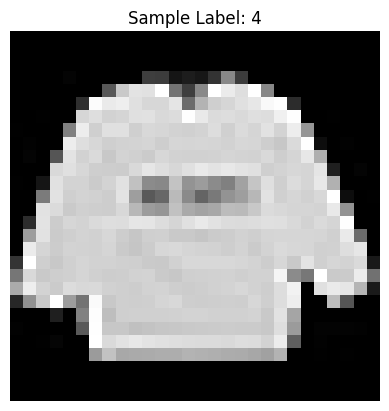

In [3]:
# Load data from the proper directory
fmnist_train_data_dir = '/content/drive/Othercomputers/My Laptop/projects/FlexiSAF/FMNIST/fashion-mnist_train.csv'
df = pd.read_csv(fmnist_train_data_dir)

# Separate features and labels
y = df.iloc[:, 0].values  # Labels
X = df.iloc[:, 1:].values  # Pixel data

# Normalize pixel values to [0, 1]
X = X / 255.0

# Reshape for CNN (samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=10)

# Optional: Visualize a sample
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(f"Sample Label: {np.argmax(y[5])}")
plt.axis('off')
plt.show()


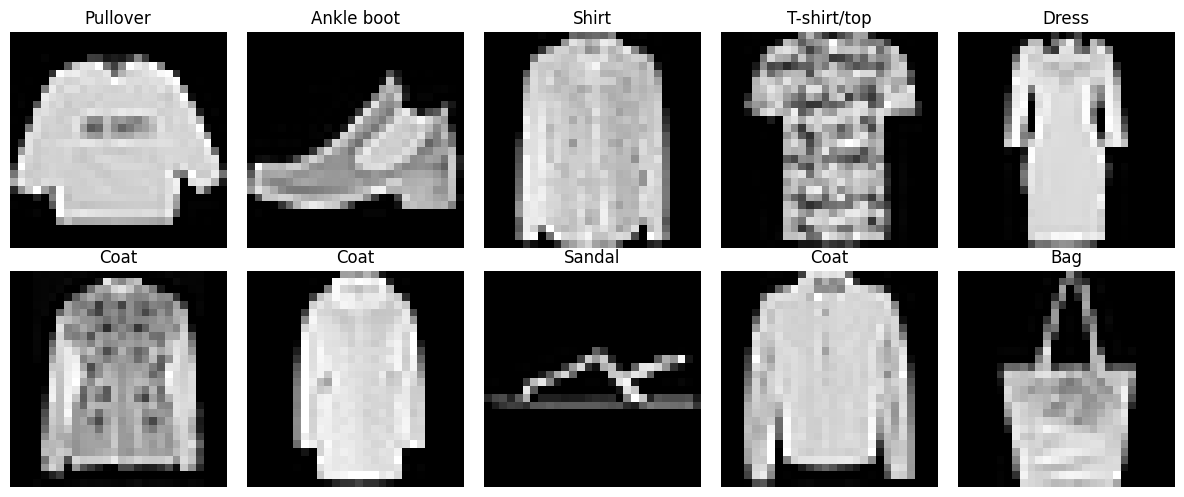

In [9]:
# The correct label mapping
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# plotting images with their proper labels
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    label_index = np.argmax(y[i])  # Convert from one-hot to label index
    plt.title(label_map[label_index]) # Title is the label of the picture
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Build the model

# Initialize a sequential CNN model
model_cnn = Sequential()

# First convolutional layer:
#  - 16 filters of size 3x3
#  - Stride = 1 (default)
#  - Activation_function = ReLU to introduce non-linearity
#  - Input shape is (28, 28, 1) since images are 28x28 grayscale
model_cnn.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(28,28,1)))

# Downsample the feature map using MaxPooling (2x2 by default)
model_cnn.add(MaxPooling2D())

# Second convolutional layer:
#  - 32 filters to extract more complex features
model_cnn.add(Conv2D(32, (3,3), 1, activation='relu'))
model_cnn.add(MaxPooling2D())

# Third convolutional layer:
#  - Reduces filters to 16 to decrease complexity
model_cnn.add(Conv2D(16, (3,3), 1, activation='relu'))
model_cnn.add(MaxPooling2D())

# Flatten the 3D output into 1D to feed into dense layers
model_cnn.add(Flatten())

# Fully connected hidden layer with 256 neurons and ReLU
model_cnn.add(Dense(256, activation='relu'))

# Output layer with 10 neurons (for 10 classes) and softmax for probability distribution
model_cnn.add(Dense(10, activation='softmax'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Compile the model and show summary

model_cnn.compile(optimizer='adam' # using the adam optimizer
                  , loss='categorical_crossentropy' # loss function
                  , metrics=['accuracy'] # metric to priortize
                  )
model_cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,346 (63.85 KB)

 Trainable params: 16,346 (63.85 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
logdir = '/content/drive/Othercomputers/My Laptop/projects/FlexiSAF/FMNIST/logs'

# TensorBoard callback for visualizing training progress
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the CNN model
hist = model_cnn.fit(
    X,                     # Training features (images)
    y,                     # Training labels (one-hot encoded)
    epochs=5,              # Train for 5 full passes over the training data
    batch_size=64,         # Number of samples per gradient update
    validation_split=0.25, # 25% of training data used for validation
    callbacks=[tensorboard_callback]  # Track progress with TensorBoard
)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5767 - loss: 1.1286 - val_accuracy: 0.7706 - val_loss: 0.6244
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.7847 - loss: 0.5819 - val_accuracy: 0.7998 - val_loss: 0.5452
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.8142 - loss: 0.5114 - val_accuracy: 0.8305 - val_loss: 0.4719
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8279 - loss: 0.4743 - val_accuracy: 0.8249 - val_loss: 0.4807
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.8337 - loss: 0.4541 - val_accuracy: 0.8376 - val_loss: 0.4486


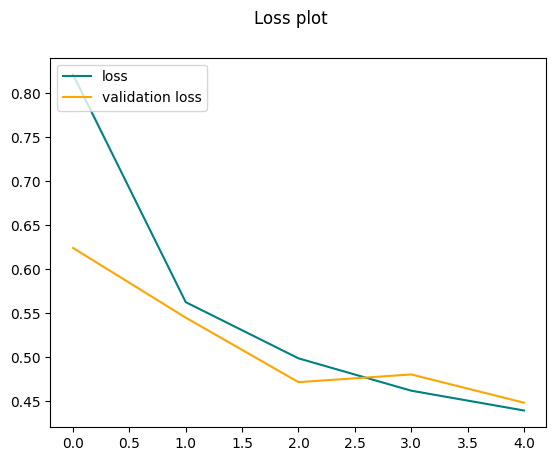

In [16]:
#plot performance

fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'validation loss')
plt.suptitle("Loss plot")
plt.legend(loc = 'upper left')
plt.show()

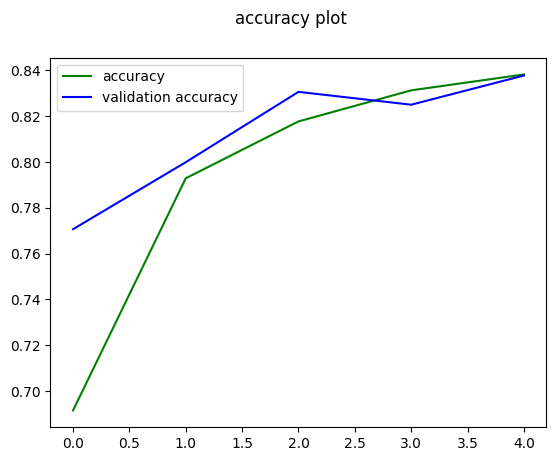

In [17]:
# Accuracy plot

fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'validation accuracy')
plt.suptitle("accuracy plot")
plt.legend(loc = 'upper left')
plt.show()

In [18]:
#save model
model_cnn.save('model_fmnist.h5')

#load model
from tensorflow.keras.models import load_model

model_cnn = load_model('model_fmnist.h5')


In [32]:
#Evaluate the model

# load the test data
fmnist_test_data_dir = '/content/drive/Othercomputers/My Laptop/projects/FlexiSAF/FMNIST/fashion-mnist_test.csv'
df_test = pd.read_csv(fmnist_train_data_dir)

# Separate features and labels
y_test = df_test.iloc[:, 0].values  # Labels
X_test = df_test.iloc[:, 1:].values  # Pixel data

# Normalize pixel values to [0, 1]
X_test = X / 255.0

# Reshape for CNN (samples, 28, 28, 1)
X_test = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)

# show the classification report
from sklearn.metrics import confusion_matrix

# Get model predictions
y_pred_probs = model_cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert from one-hot probabilities to class index


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step


Test Accuracy: 0.8425


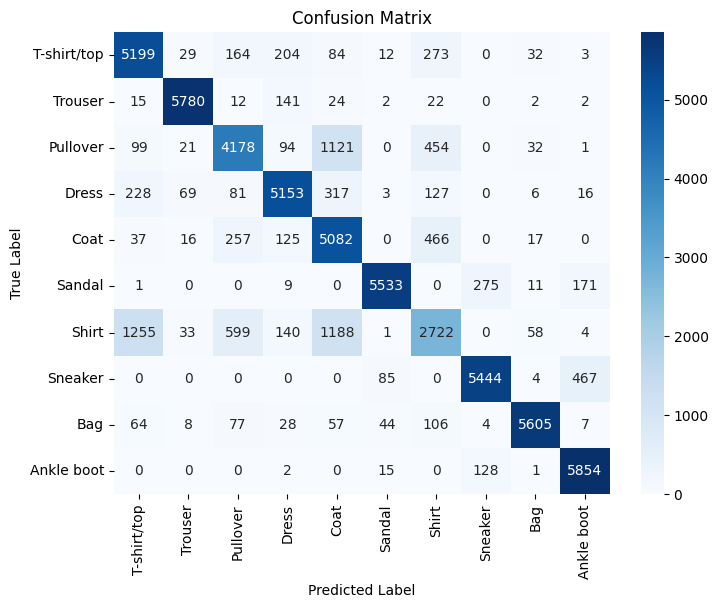

In [41]:
# the accuracy of the model on the training set
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {accuracy:.4f}")

# Plot confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map.values(), yticklabels=label_map.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##### 84 percent accuracy acheived

In [42]:
#Ensemble Learning ---- Random Forest and Hyper Paramter Tuning using GridSearchCV

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

In [43]:
# loading the Loan data
loan_data_dir = '/content/drive/Othercomputers/My Laptop/projects/FlexiSAF/loan_prediction/loan_data.csv'
loan_data = pd.read_csv(loan_data_dir)

# view the top 5 of the data
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [45]:
# extract the important columns
loan_data = loan_data[['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
                       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
                       'Property_Area', 'Loan_Status']]

# replace all null values of the categorical columsn with the mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)

# replace all null values of numerical column with the mean value
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)

# encode the Target Column
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})

# encode the categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
loan_data = pd.get_dummies(loan_data, columns=categorical_cols, drop_first=True)

# review the dataset
loan_data.head()

<ipython-input-45-6522be875ee1>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)
<ipython-input-45-6522be875ee1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)
<ipython-input-45-6522be875ee1>:12: FutureWarning: A value 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.000000,360.0,1.0,1,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.000000,360.0,1.0,1,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.000000,360.0,1.0,1,True,False,False,False,False,False,False,False,True


In [46]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    int64  
 6   Gender_Male              614 non-null    bool   
 7   Married_Yes              614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Education_Not Graduate   614 non-null    bool   
 12  Self_Employed_Yes        614 non-null    bool   
 13  Property_Area_Semiurban  614 non-null    bool   
 14  Property_Area_Urban      6

In [47]:
# Train test split
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


In [48]:
# lists of parameters to be tuned with possible values

n_estimators_list = [30, 50]
criterion_list = ['gini']
max_depth_list = [15, 20]
min_samples_split_list = [0.001, 0.005]
min_samples_leaf_list = [0.001, 0.005]
max_features_list = ['sqrt', 'log2']

# the grid of the parameters to be tuned
params_grid = {
    'n_estimators' : n_estimators_list,
    'criterion' : criterion_list,
    'max_depth' : max_depth_list,
    'min_samples_split' : min_samples_split_list,
    'min_samples_leaf' : min_samples_leaf_list,
    'max_features' : max_features_list
}

In [50]:
# checking the number of possible parameter combinations

num_combinations = 1

for i in params_grid.keys():
  num_combinations *= len(params_grid[i])

print(f' Number of combinations {num_combinations}')
params_grid

 Number of combinations 32


{'n_estimators': [30, 50],
 'criterion': ['gini'],
 'max_depth': [15, 20],
 'min_samples_split': [0.001, 0.005],
 'min_samples_leaf': [0.001, 0.005],
 'max_features': ['sqrt', 'log2']}

In [51]:
# Hyperparameter Tuning with GridSearchCV using the X and y not the train and test sets

# defining the accuracy metric to be used
def my_accuracy_score(model, X, y):
  return metrics.accuracy_score(y, model.predict(X))

model_rf = GridSearchCV(
    estimator = RandomForestClassifier(class_weight='balanced'),  # Use Random Forest and balance classes due to class imbalance
    param_grid = params_grid,     # Dictionary of hyperparameters to try
    cv = 4,                       # 4-fold cross-validation to validate model performance
    scoring = my_accuracy_score, # custom accuracy scoring function
    return_train_score = True,   # return training scores
    verbose = 5                  # print progress
)

# tune parameters with the dataset
model_rf.fit(X,y)

# print the best parameters
model_rf.best_params_

Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV 1/4] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=30;, score=(train=0.998, test=0.779) total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=30;, score=(train=0.996, test=0.766) total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=30;, score=(train=0.996, test=0.778) total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=30;, score=(train=0.998, test=0.784) total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=50;, score=(train=1.000, test=0.786) total time=   0.1s
[CV 2/4] END criterion=gini, max_depth

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.005,
 'n_estimators': 50}

In [52]:
# best parameters:
# {'criterion': 'gini',
#  'max_depth': 15,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 0.001,
#  'min_samples_split': 0.005,
#  'n_estimators': 50}

# using the best parameters for the classifier and training with the train set
model_rf_clf = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 15,
    min_samples_split = 0.005,
    min_samples_leaf = 0.001,
    n_estimators = 50,
    max_features = 'sqrt',
    random_state = 24
)

model_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=0.001,
                       min_samples_split=0.005, n_estimators=50,
                       random_state=24)

In [55]:
model_rf_clf.feature_importances_

array([0.17215589, 0.12065772, 0.18154495, 0.05434894, 0.29868718,
       0.02117744, 0.02497123, 0.01713222, 0.01336527, 0.0155454 ,
       0.02061104, 0.01778301, 0.02402985, 0.01798987])

The accuracy of the model is 0.7727272727272727


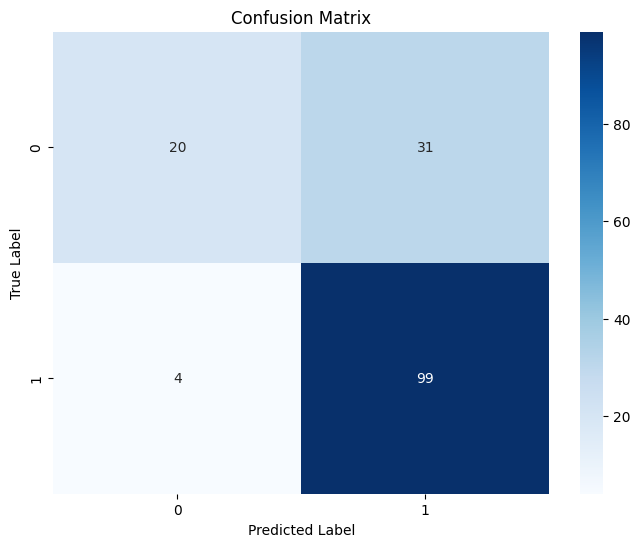

In [58]:
# Evaluate the model
y_pred = model_rf_clf.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy_rf}")

# 77 percent accuracy

cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


Accuracy: 0.7727272727272727

Confusion Matrix:
 [[20 31]
 [ 4 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.39      0.53        51
           1       0.76      0.96      0.85       103

    accuracy                           0.77       154
   macro avg       0.80      0.68      0.69       154
weighted avg       0.79      0.77      0.74       154



In [62]:
import joblib

# Save the best model found by GridSearchCV
joblib.dump(model_rf_clf, 'random_forest_model.joblib')


['random_forest_model.joblib']